In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## 2

In [12]:
g<-read.graph("edge_weight.txt",format="ncol",directed=TRUE)

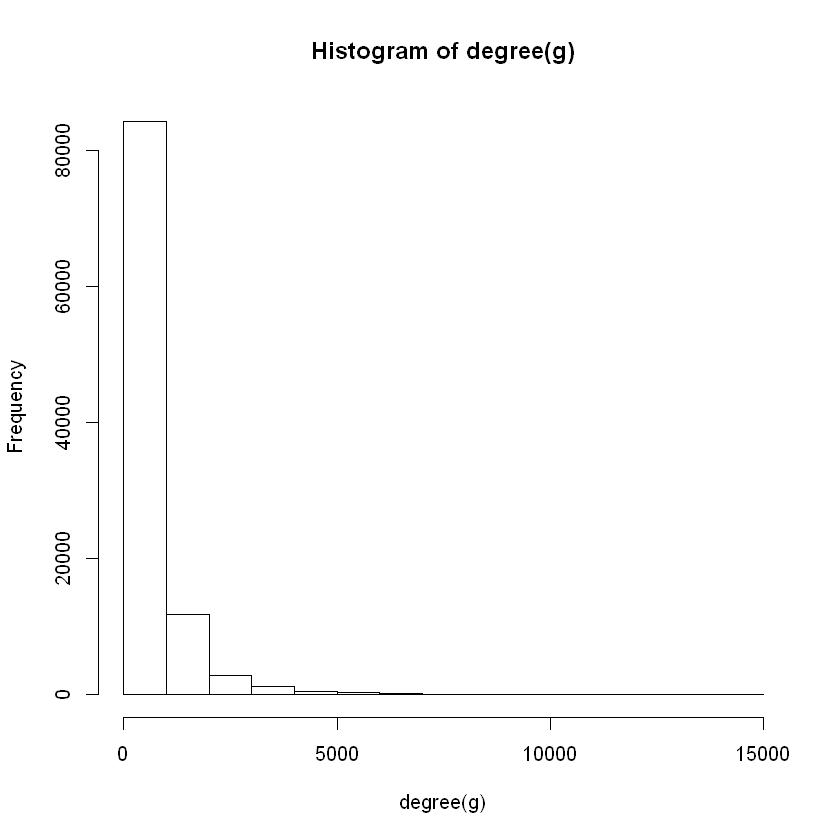

In [4]:
hist(degree(g))

## 4

In [13]:
pr<-page.rank(g,algo="prpack",directed=T,damping=0.85,weights=NULL)

In [7]:
rankscore <- pr$vector
high_score<-sort(pr$vector,decreasing=TRUE)

In [19]:
high_score[1:10]

76983        59399        24891         5872        40894        47530 
0.0002497721 0.0002097215 0.0002095156 0.0002071094 0.0001834958 0.0001685735 
       36345        28904        16268        44724 
0.0001658508 0.0001644919 0.0001603092 0.0001569875

## the high score people have more in-degree than people listed above, so they are more likely to be recommended which represented by their high page rank

In [31]:
top_10=c(76983,59399,24891,5872,40894,47530,36345,28904,16268,44724)
for (i in top_10){
    print(degree(g)[as.character(i)])
}

76983 
14552 
59399 
 7514 
24891 
13452 
5872 
6300 
40894 
12760 
47530 
10884 
36345 
 5042 
28904 
 5450 
16268 
 5620 
44724 
10706 


## 5

In [14]:
previous_actor=c('13060','99512','11535','24547','29131','15178','56512','96436','15544','47947')
for (i in previous_actor){
    print(degree(g)[as.character(i)])
}

13060 
 3116 
99512 
  862 
11535 
 2970 
24547 
 3912 
29131 
 2516 
15178 
 4120 
56512 
 2452 
96436 
 3022 
15544 
 2446 
47947 
 3288 


In [15]:
pr$vector[previous_actor]

13060        99512        11535        24547        29131        15178 
4.106867e-05 1.848331e-05 4.123129e-05 5.273115e-05 4.279794e-05 5.624381e-05 
       56512        96436        15544        47947 
3.253708e-05 4.097918e-05 3.238108e-05 4.434558e-05

## 6

In [2]:
g_mew<-read.graph("movie_edge_weight.txt",format="ncol",directed=FALSE)

In [4]:
ecount(g_mew)

[1] 65741163

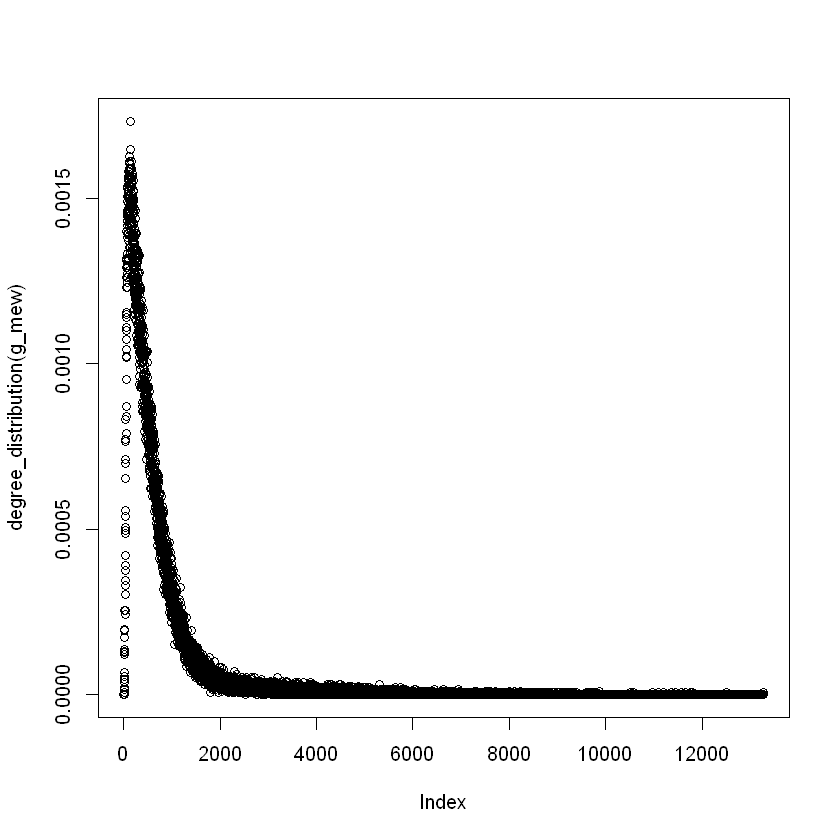

In [4]:
plot(degree_distribution(g_mew))

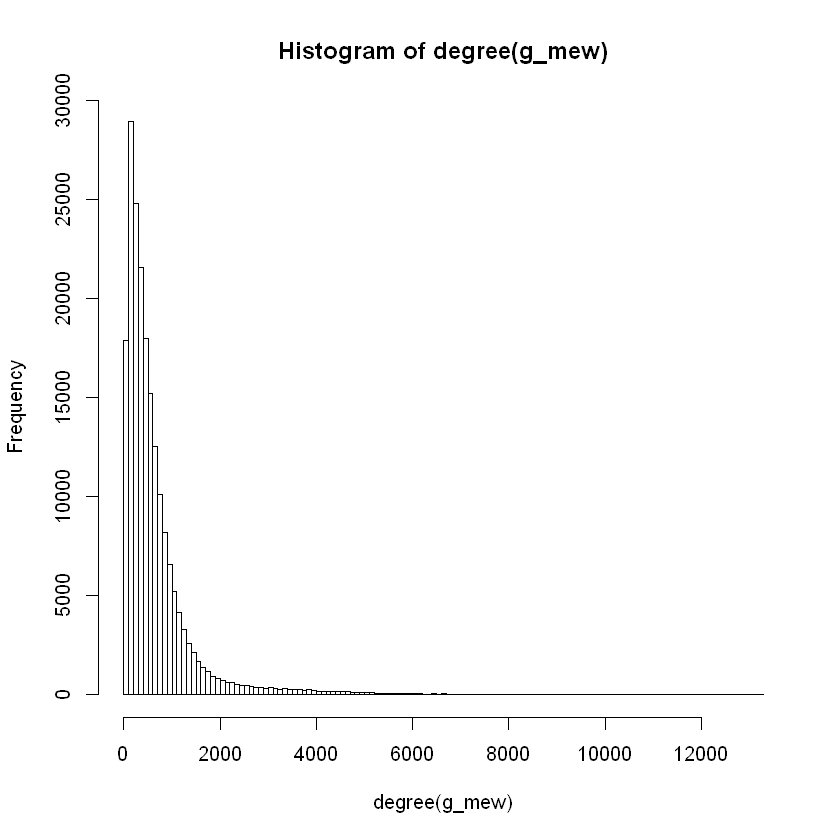

In [6]:
hist(degree(g_mew),breaks=100)

## 7

In [3]:
fs<-fastgreedy.community(g_mew)

In [4]:
## we pick the first 10 community to analysis
## and write to a file for the use of python
indicator=c('$1','$2',"$3",'$4','$5','$6','$7','$8','$9','$10')
for (i in 1:10){
    lapply(indicator[[i]][1],write,"movie_community.txt",append=TRUE)
    lapply(fs[i], write, "movie_community.txt", append=TRUE)
}

## 8(c)

In [155]:
for (i in fs[30]){
    ed=c()
    for (j in i[1:length(i)-1]){
        for (k in i[2:length(i)]){
            if (get.edge.ids(g_mew,c(j,k))){
                ed<-c(ed,strtoi(j),strtoi(k))
            }
        }     
    } 
}

In [150]:
fs[30]

$`30`
 [1] "101515" "101514" "101516" "101517" "101518" "101519" "101520" "101521"
 [9] "101522" "101523" "101864" "101865" "151138"

In [224]:
library(hash)
fs30bi <- hash()
fs30 <- file("fs30.txt")
for (i in readLines(fs30)){
    a = unlist(strsplit(i,'\t\t'))
    fs30bi[[a[1]]] = a[2:length(a)]  
}    



In [265]:
fs30edge = c()
count = 1
for (i in keys(fs30bi)){
    a = values(fs30bi,keys = i)
    for (b in a){
        fs30edge = c(fs30edge, i, b)

    }
}

In [291]:
gtttt<-make_empty_graph(directed=F)

In [294]:
gtttt<- gtttt + vertices(unique(fs30edge))

In [295]:
gtttt<- gtttt + edges(fs30edge)

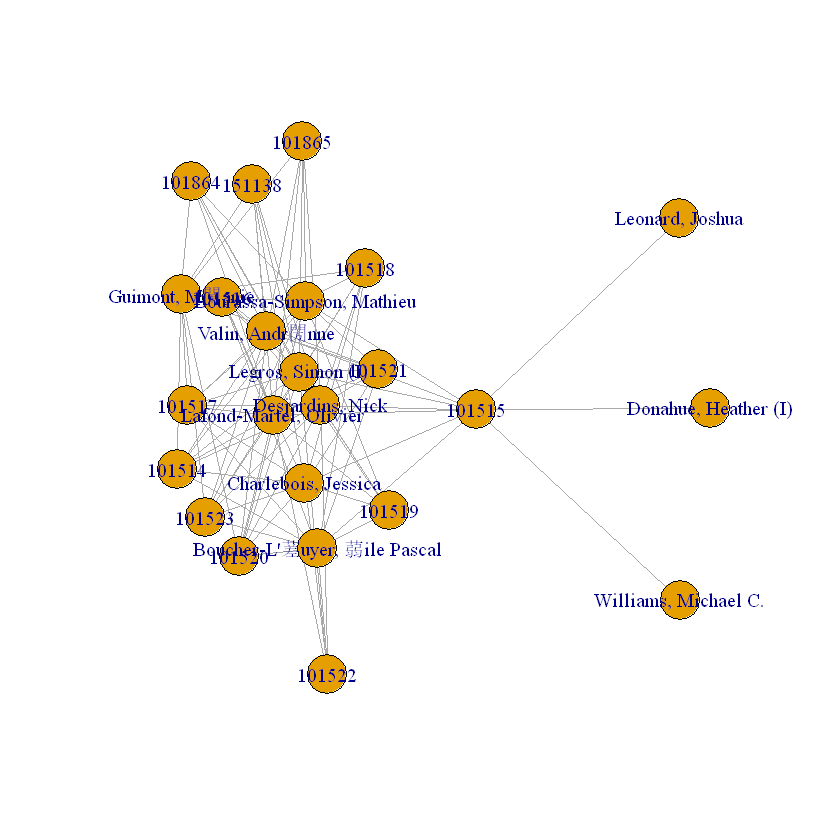

In [296]:
plot(gtttt)

In [304]:
V(gtttt)

+ 24/24 vertices, named, from b2d0190:
 [1] 101514                         Boucher-L'蒫uyer, 蒻ile Pascal
 [3] Bourassa-Simpson, Mathieu      Desjardins, Nick              
 [5] Lafond-Martel, Olivier         Legros, Simon (I)             
 [7] Charlebois, Jessica            Guimont, M閘anie              
 [9] Valin, Andr閍nne               101515                        
[11] Leonard, Joshua                Williams, Michael C.          
[13] Donahue, Heather (I)           101516                        
[15] 101517                         101518                        
[17] 101519                         101520                        
[19] 101521                         101522                        
+ ... omitted several vertices

In [306]:
degree(gtttt)

101514 Boucher-L'蒫uyer, 蒻ile Pascal 
                             8                             10 
     Bourassa-Simpson, Mathieu               Desjardins, Nick 
                            11                             13 
        Lafond-Martel, Olivier              Legros, Simon (I) 
                            13                             13 
           Charlebois, Jessica               Guimont, M閘anie 
                            11                             10 
              Valin, Andr閍nne                         101515 
                            11                             10 
               Leonard, Joshua           Williams, Michael C. 
                             1                              1 
          Donahue, Heather (I)                         101516 
                             1                              8 
                        101517                         101518 
                             8                              7 
                        101519                         101520 
                             7                              8 
                        101521                         101522 
                             8                              5 
                        101523                         101864 
                             8                              6 
                        101865                         151138 
                             6                              6

Desjardins, Nick, Legros, Simon (I),Lafond-Martel, Olivier

## 9

In [108]:
nm<-c('9980','37745','76343')

In [109]:
m1<-neighbors(g_mew,'9980')
m2<-neighbors(g_mew,'37745')
m3<-neighbors(g_mew,'76343')

In [111]:
lapply("m1",write,"neighbors9.txt",append=TRUE)
lapply(m1,write,"neighbors9.txt",append=TRUE)
lapply("m2",write,"neighbors9.txt",append=TRUE)
lapply(m2, write, "neighbors9.txt", append=TRUE)
lapply("m3",write,"neighbors9.txt",append=TRUE)
lapply(m3, write, "neighbors9.txt", append=TRUE)

[[1]]
NULL

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: 值的长度必需为1，
 但FUN(X[[1]])结果的长度却是0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\t<dd>%s</dd>\n", escape_fun =

$`4476`
NULL

$`102235`
NULL

$`63904`
NULL

$`9997`
NULL

$`44685`
NULL

$`1423`
NULL

$`10550`
NULL

$`155362`
NULL

$`155365`
NULL

$`25143`
NULL

$`156302`
NULL

$`81124`
NULL

$`138137`
NULL

$`9259`
NULL

$`87801`
NULL

$`49144`
NULL

$`113978`
NULL

$`19323`
NULL

$`41016`
NULL

$`50083`
NULL

$`18876`
NULL

$`9978`
NULL

$`25018`
NULL

$`113895`
NULL

$`32183`
NULL

$`20415`
NULL

$`3417`
NULL

$`141893`
NULL

$`50795`
NULL

$`2503`
NULL

$`10013`
NULL

$`8784`
NULL

$`173244`
NULL

$`161306`
NULL

$`41346`
NULL

$`98128`
NULL

$`66583`
NULL

$`136090`
NULL

$`68039`
NULL

$`73095`
NULL

$`9968`
NULL

$`53955`
NULL

$`46438`
NULL

$`73913`
NULL

$`21228`
NULL

$`35495`
NULL

$`40353`
NULL

$`61566`
NULL

$`130599`
NULL

$`32188`
NULL

$`156965`
NULL

$`59183`
NULL

$`23012`
NULL

$`135923`
NULL

$`17034`
NULL

$`1891`
NULL

$`3413`
NULL

$`129569`
NULL

$`37888`
NULL

$`55356`
NULL

$`10549`
NULL

$`22482`
NULL

$`19046`
NULL

$`42420`
NULL

$`124289`
NULL

$`66588`
NULL

$`757

[[1]]
NULL

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: 值的长度必需为1，
 但FUN(X[[1]])结果的长度却是0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\t<dd>%s</dd>\n", escape_fun =

$`5918`
NULL

$`33531`
NULL

$`15389`
NULL

$`34949`
NULL

$`87801`
NULL

$`49144`
NULL

$`113978`
NULL

$`76194`
NULL

$`5358`
NULL

$`37750`
NULL

$`37748`
NULL

$`34507`
NULL

$`16091`
NULL

$`93080`
NULL

$`3417`
NULL

$`182772`
NULL

$`12513`
NULL

$`56720`
NULL

$`19322`
NULL

$`9968`
NULL

$`39785`
NULL

$`66365`
NULL

$`63635`
NULL

$`8666`
NULL

$`25`
NULL

$`38945`
NULL

$`46361`
NULL

$`92256`
NULL

$`83576`
NULL

$`91432`
NULL

$`104267`
NULL

$`56165`
NULL

$`93155`
NULL

$`13977`
NULL

$`34990`
NULL

$`2309`
NULL

$`63660`
NULL

$`63639`
NULL

$`122186`
NULL

$`52171`
NULL

$`22221`
NULL

$`150204`
NULL

$`24658`
NULL

$`53967`
NULL

$`41012`
NULL

$`63632`
NULL

$`59182`
NULL

$`63626`
NULL

$`62318`
NULL

$`25210`
NULL

$`58929`
NULL

$`29979`
NULL

$`33254`
NULL

$`102935`
NULL

$`11199`
NULL

$`132004`
NULL

$`29980`
NULL

$`29996`
NULL

$`855`
NULL

$`30003`
NULL

$`14844`
NULL

$`54314`
NULL

$`63642`
NULL

$`32536`
NULL

$`53475`
NULL

$`27539`
NULL

$`15563`
NULL


[[1]]
NULL

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: 值的长度必需为1，
 但FUN(X[[1]])结果的长度却是0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\t<dd>%s</dd>\n", escape_fun =

$`139653`
NULL

$`15709`
NULL

$`37926`
NULL

$`14761`
NULL

$`84464`
NULL

$`97884`
NULL

$`16091`
NULL

$`93080`
NULL

$`7572`
NULL

$`27697`
NULL

$`112950`
NULL

$`119302`
NULL

$`5924`
NULL

$`36246`
NULL

$`62694`
NULL

$`3519`
NULL

$`35495`
NULL

$`39606`
NULL

$`63635`
NULL

$`47646`
NULL

$`21298`
NULL

$`17034`
NULL

$`9808`
NULL

$`37888`
NULL

$`82281`
NULL

$`114149`
NULL

$`7359`
NULL

$`56702`
NULL

$`93065`
NULL

$`56165`
NULL

$`38713`
NULL

$`72149`
NULL

$`16178`
NULL

$`46184`
NULL

$`62720`
NULL

$`12508`
NULL

$`56132`
NULL

$`186222`
NULL

$`38768`
NULL

$`16179`
NULL

$`39142`
NULL

$`64159`
NULL

$`60677`
NULL

$`36250`
NULL

$`58096`
NULL

$`107221`
NULL

$`36219`
NULL

$`4299`
NULL

$`163126`
NULL

$`33`
NULL

$`79869`
NULL

$`19636`
NULL

$`149853`
NULL

$`38709`
NULL

$`9032`
NULL

$`65471`
NULL

$`81013`
NULL

$`71171`
NULL

$`110773`
NULL

$`106962`
NULL

$`32540`
NULL

$`9296`
NULL

$`13485`
NULL

$`116670`
NULL

$`90402`
NULL

$`16195`
NULL

$`172020`


## 10

In [110]:
for (k in nm){
    for (i in 1:length(fs)){
        if ( k %in% unlist(fs[i])){
        print(i)
        }
    }   
}

[1] 2
[1] 2
[1] 2


In [114]:
indexx=c('m1','m2','m3')
for (i in 1:3){
    lapply(indexx[i],write,"neighbors10.txt",append=TRUE)
    for (j in neighbors(g_mew,nm[i])){
        if (j %in% unlist(fs[2])){
            lapply(j,write,"neighbors10.txt",append=TRUE)    
        }       
    }
}

## 11

In [168]:
##1 BAT
hzedgeid = c()
hzedgeweight = c()
for (j in vertex_attr(g_mew, 'name', neighbors(g_mew,'9980'))){
    a = get.edge.ids(g_mew, c('9980',j), directed = TRUE, error = FALSE, multi = FALSE)
    b = get.edge.attribute(g_mew, "weight",a)
    hzedgeid = c(hzedgeid,a)
    hzedgeweight = c(hzedgeweight,b)
}
max5<-tail(sort(hzedgeweight),5)
max5edgeid<-hzedgeid[match(max5,hzedgeweight)]


In [170]:
ends(g_mew,max5edgeid,name=TRUE)

9980,3210
9980,9157
9980,32064
9980,10016
111779,9980


In [172]:
## need to return movie names in python
vn=c('3210','9157','32064','10016','111779')
for (i in vn){
    for (j in 1:length(fs)){
        if (i %in% unlist(fs[j])){
            print(j) 
        }
    }    
}

[1] 2
[1] 2
[1] 2
[1] 2
[1] 2


In [173]:
##2 MISSIONIMPOSSIBLE
hzedgeid = c()
hzedgeweight = c()
for (j in vertex_attr(g_mew, 'name', neighbors(g_mew,'37745'))){
    a = get.edge.ids(g_mew, c('37745',j), directed = TRUE, error = FALSE, multi = FALSE)
    b = get.edge.attribute(g_mew, "weight",a)
    hzedgeid = c(hzedgeid,a)
    hzedgeweight = c(hzedgeweight,b)
}
max5<-tail(sort(hzedgeweight),5)
max5edgeid<-hzedgeid[match(max5,hzedgeweight)]
ends(g_mew,max5edgeid)

37745,37747
37745,55767
37745,66511
37745,31539
37745,31530


In [174]:
## need to return movie names in python
vn=c('37747','55767','66511','31539','31530')
for (i in vn){
    for (j in 1:length(fs)){
        if (i %in% unlist(fs[j])){
            print(j) 
        }
    }    
}

[1] 2
[1] 2
[1] 2
[1] 15
[1] 15


In [175]:
##3 MINIONS
hzedgeid = c()
hzedgeweight = c()
for (j in vertex_attr(g_mew, 'name', neighbors(g_mew,'76343'))){
    a = get.edge.ids(g_mew, c('76343',j), directed = TRUE, error = FALSE, multi = FALSE)
    b = get.edge.attribute(g_mew, "weight",a)
    hzedgeid = c(hzedgeid,a)
    hzedgeweight = c(hzedgeweight,b)
}
max5<-tail(sort(hzedgeweight),5)
max5edgeid<-hzedgeid[match(max5,hzedgeweight)]
ends(g_mew,max5edgeid)

76343,36225
76343,59251
76343,50577
76343,16134
36219,76343


In [179]:
## need to return movie names in python
vn=c('36225','59251','50577','16134','36219')
for (i in vn){
    for (j in 1:length(fs)){
        if (i %in% unlist(fs[j])){
            print(j) 
        }
    }    
}

[1] 2
[1] 2
[1] 2
[1] 2
[1] 2


## 12

In [ ]:
for (i in 1:length(V(g))){
    lapply(c(V(g)[i]$name,pr$vector[V(g)[i]$name]),write,"actor_page_rank.txt",append=TRUE)     
}

## 13

In [2]:
Bipartite <- "Bipartite.txt"
m1a<-read.table("m1a.txt")
m2a<-read.table("m2a.txt")
m3a<-read.table("m3a.txt")
g_bipartite <- read_graph(Bipartite,format="ncol",directed=FALSE)
nm1 <- list()
for(i in 1:length(m1a)){
  actor <- m1a[[i]]
  nm1<-vertex_attr(g_bipartite, 'name', neighbors(g_bipartite, which(names(V(g_bipartite))==actor)))
  lapply(nm1,write,"nm1.txt",append=TRUE)  
  lapply("1",write,"nm1.txt",append=TRUE)  
}
nm2 <- list()
for(i in 1:length(m2a)){
  actor <- m2a[[i]]
  nm2<-vertex_attr(g_bipartite, 'name', neighbors(g_bipartite, which(names(V(g_bipartite))==actor)))
  lapply(nm2,write,"nm2.txt",append=TRUE)
  lapply("1",write,"nm2.txt",append=TRUE)
}
nm3 <- list()
for(i in 1:length(m3a)){
  actor <- m3a[[i]]
  nm3<-vertex_attr(g_bipartite, 'name', neighbors(g_bipartite, which(names(V(g_bipartite))==actor)))
  lapply(nm3,write,"nm3.txt",append=TRUE)  
  lapply("1",write,"nm3.txt",append=TRUE)
}